In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [13]:
df = pd.read_csv('Preprocessed Amazon Sales Data.csv',low_memory=False)
df.shape

(128975, 25)

## **Histogram for Amount distribution**

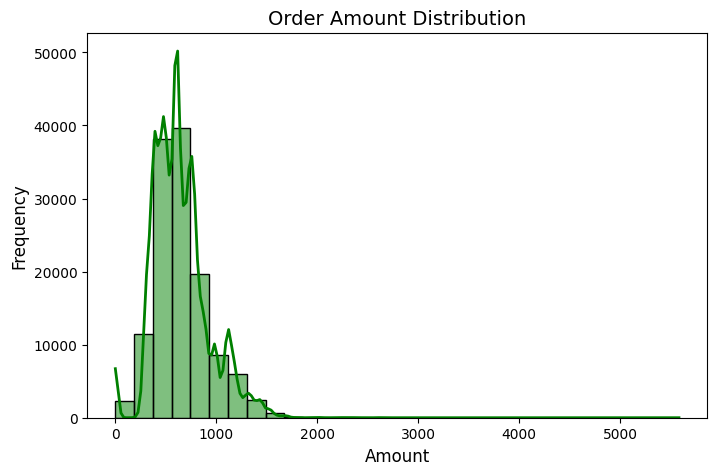

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Amount'], bins=30, kde=True, color='green', edgecolor='black', line_kws={'color': 'red', 'linewidth': 2})
plt.title('Order Amount Distribution', fontsize=14)
plt.xlabel('Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

## **Pie Chart For Merchant Distribution**

In [15]:
fulfilment_counts = df['Fulfilment'].value_counts().reset_index()

px.pie(
    data_frame=fulfilment_counts,
    names='Fulfilment',
    values='count',
    labels={'Fulfilment': 'Fulfilment Type', 'count': 'Order Count'},
    title="Merchant Distribution"
).show()


## **Bar Chart for Top Cities of Orders**

In [16]:
top_cities = df['ship-city'].value_counts().reset_index().head(7)
top_cities.columns = ['City','Count']

px.bar(
    top_cities,
    x= 'City',
    y='Count',
    color='City', 
    title = "High Order Cities"
).show()


## **Donut Chart for Order-Status Distribution**

In [26]:
status_count = df['Status'].value_counts().reset_index()
status_count.columns = ['Status', 'Count']


fig = px.pie(
    status_count,
    values='Count',  
    names='Status',  
    title="Order Status Distribution",
    hole=0.5,        
)
fig.update_traces(textposition='inside', textinfo='percent+label')  
fig.show()

In [18]:
df['Total Sales'] = df['Qty'] * df['Amount']

In [19]:
df['Date'] = pd.to_datetime(df['Date'],format='%m-%d-%y')

In [20]:
df['Day'] = df['Date'].dt.day_name()

In [21]:
df['Month'] = df['Date'].dt.month_name()

## **SubPlot Graph for Monthly Sales**

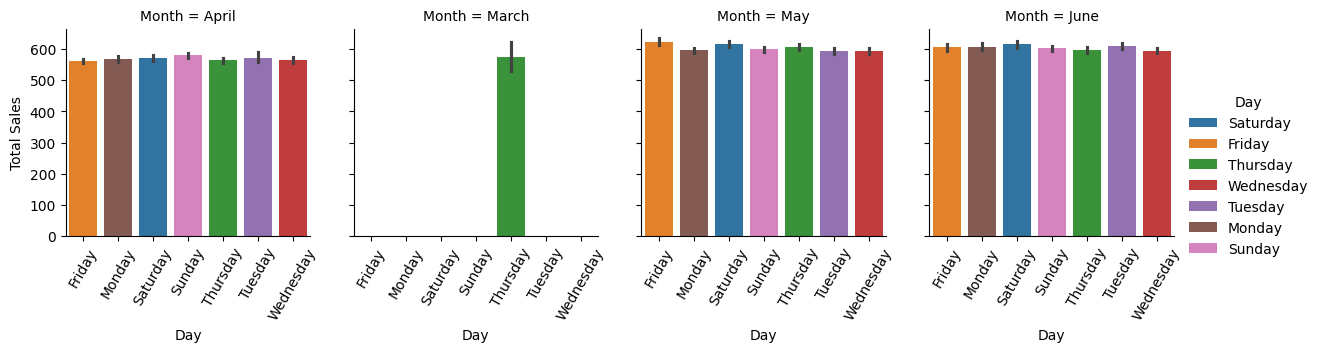

In [22]:
graph = sns.FacetGrid(df,col='Month',hue='Day')
graph.map(sns.barplot,'Day','Total Sales',order=sorted(df['Day'].unique())).add_legend()


for ax in graph.axes.flat:
    ax.tick_params(axis='x', rotation=60)


plt.show()

## **Bar Graph for Top Category with Sales**

In [23]:
category_sales = df.groupby('Category')['Total Sales'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,6))
px.bar(
    data_frame=category_sales,
    x='Category',
    y='Total Sales',
    color='Category',
    title="Top Category with Sales",
    log_y = True
).show()

<Figure size 1500x600 with 0 Axes>

## **Horizontal Bar Graph for Monthly Orders Distribution**

In [25]:
month_order = [
     'March', 'April', 'May', 'June',
]


df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

monthly_orders = df['Month'].value_counts().reset_index().sort_values(by='Month')

fig = px.bar(
    data_frame=monthly_orders,
    x='count',
    y='Month', 
    color='Month',
    title="Monthly Orders",
    orientation='h'  
)

fig.show()


# Visualization Conclusions

## 1. Order Amount Distribution
- The majority of orders are concentrated in the lower price range (below **2000** units).
- There is a long right tail, indicating the presence of a few high-value orders.
- The highest order amount observed is over 5000, but such transactions are rare.
- Most transactions fall between 500 to 1500, making it the most common range for purchases.

## 2. High Order Cities
- A few cities contribute the highest number of orders, indicating high demand in these locations.
- The city with the highest order count shows a significantly larger volume compared to others.
- Some cities have consistently low order numbers, possibly due to lower population density or limited market reach.

## 3. Merchant Distribution
- A small number of merchants dominate the sales, accounting for a significant portion of total transactions.
- The majority of merchants have relatively low order counts.
- The top-performing merchant records significantly higher transactions, suggesting better market positioning.

## 4. Monthly Orders
- Order volumes vary by month, with some months experiencing peak sales.
- The highest number of orders is recorded in **May**, making it the most active month.
- **March** shows an unusual trend with a low number of transactions on certain days, which may need further investigation.

## 5. Monthly Sales Report
- The highest sales were observed in **May**, with consistently high transaction values.
- **March** had the lowest recorded sales, possibly due to fewer active shopping days.
- Sales fluctuations indicate seasonal trends, highlighting periods of high consumer activity.

## 6. Order Status Distribution
- A significant proportion of orders are marked as "Completed," indicating a smooth purchasing process.
- A notable percentage of orders remain "Pending" or "Canceled," pointing to potential issues in logistics or payments.
- Addressing the reasons behind cancellations can improve revenue and customer experience.

## 7. Top Category Products
- Certain product categories consistently achieve higher sales.
- The highest-selling category outperforms the others significantly, showing strong customer preference.
- The least-performing category may require better promotion or reconsideration in the product lineup.

## General Observations
- Sales trends indicate seasonal variations, with some months performing better than others.
- Specific merchants and cities dominate the market, showing opportunities for targeted marketing.
- Reducing order cancellations and optimizing underperforming categories could lead to better overall sales.

